In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

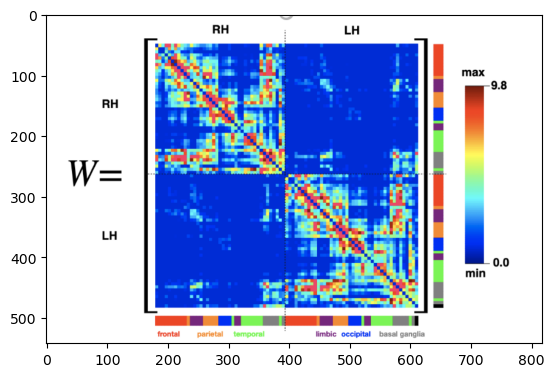

In [4]:
# 1 - read color image (3 color channels)
path_to_fig = "../plots/heatmap.jpg"
path_to_fig_1 = "../plots/heatmap_1.png"

image = cv2.imread(path_to_fig,1)
imimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(imimage)
plt.show()

Offset to heatmap center: (396, 267)


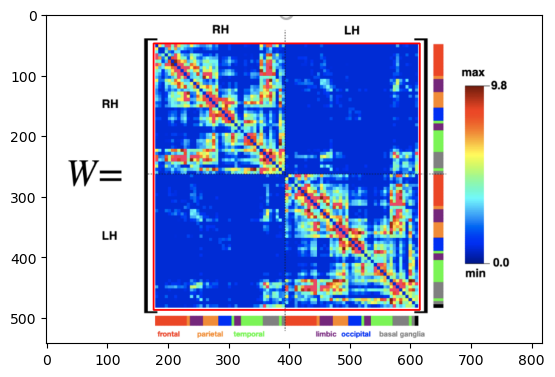

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use a threshold to find the heatmap
# This threshold would have to be adjusted to the specific color distribution of the heatmap
_, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours of the heatmap
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the heatmap
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Calculate the center offset of the heatmap
offset_x = x + w//2
offset_y = y + h//2
print(f"Offset to heatmap center: ({offset_x}, {offset_y})")

# show the detected area on the original image
detected_image = cv2.rectangle(imimage.copy(), (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(detected_image)
plt.show()


Offsets to heatmap: [180, 48, 201, 58]
Actual width of heatmap: 437
Actual height of heatmap: 436
Cell size (width x height): (5.265060240963855, 5.253012048192771)


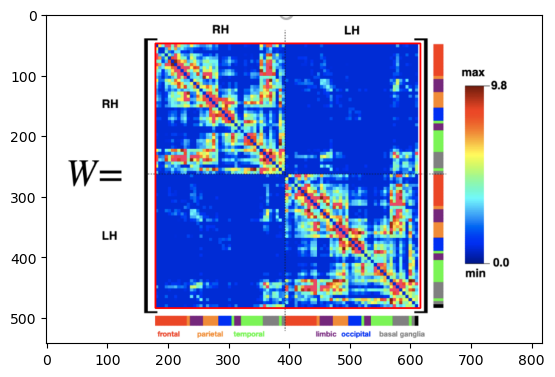

In [16]:
# Adaptive thresholding to find the heatmap
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY_INV, 11, 2)

# Find contours of the heatmap
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the heatmap
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Calculate the offsets from each side of the image to the heatmap borders
offset_left = x
offset_top = y
offset_right = image.shape[1] - (x + w)
offset_bottom = image.shape[0] - (y + h)

# Store offsets in a list
offsets = [offset_left, offset_top, offset_right, offset_bottom]

# Calculate the cell size given n nodes on each side of the heatmap
n_nodes = 83  # Example value for n nodes, replace with the actual number
cell_width = w / n_nodes
cell_height = h / n_nodes

# Display results
print(f"Offsets to heatmap: {offsets}")
print(f"Actual width of heatmap: {w}")
print(f"Actual height of heatmap: {h}")
print(f"Cell size (width x height): ({cell_width}, {cell_height})")

# show the detected area on the original image
detected_image = cv2.rectangle(imimage.copy(), (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(detected_image)
plt.show()



In [17]:
# Find contours of the heatmap
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Calculate the cell size based on the heatmap size and the number of nodes (83 x 83)
cell_size_x = w // 83
cell_size_y = h // 83

# Initialize the weight matrix
weight_matrix = np.zeros((83, 83))

legend_start = 0
legend_end = 9.8

# Extract cell intensities and normalize them
for row in range(83):
    for col in range(83):
        cell_x = x + col * cell_size_x
        cell_y = y + row * cell_size_y
        cell = gray_image[cell_y:cell_y + cell_size_y, cell_x:cell_x + cell_size_x]
        cell_intensity = np.mean(cell)
        weight_matrix[row, col] = cell_intensity

# Normalize the weight matrix to the range between legend_start and legend_end
min_intensity = weight_matrix.min()
max_intensity = weight_matrix.max()

# Apply normalization
weight_matrix = legend_start + ((weight_matrix - min_intensity) * (legend_end - legend_start)) / (max_intensity - min_intensity)

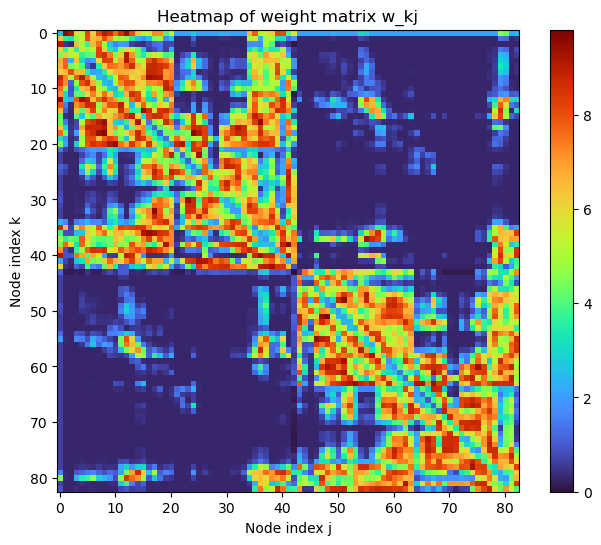

In [18]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(weight_matrix, cmap='turbo')
plt.colorbar(heatmap)
plt.title('Heatmap of weight matrix w_kj')
plt.xlabel('Node index j')
plt.ylabel('Node index k')
plt.show()

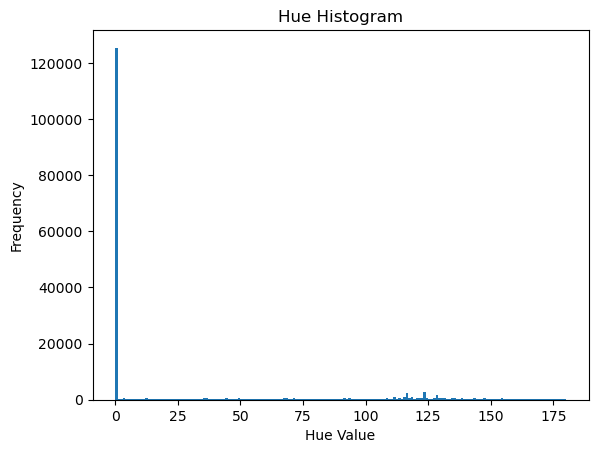

In [19]:
# Load the original RGB image
image = cv2.imread(path_to_fig)

# Convert to HSV color space
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hue_channel = rgb_image[:, :, 0]  # Hue channel

# Plot a histogram of the hue channel
plt.figure()
plt.title("Hue Histogram")
plt.xlabel("Hue Value")
plt.ylabel("Frequency")
plt.hist(hue_channel.ravel(), 180, [0, 180])  # Adjust the range if needed
plt.show()